In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample

In [2]:
course=pd.read_csv('Udemy_Course.csv', encoding= 'unicode_escape')
course

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z
...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z


In [3]:
ratings=pd.read_csv('rating.csv')
ratings

,course_id,subject,ratings
0,1070968,Business Finance,1.5
1,1113822,Business Finance,5.0
2,1006314,Business Finance,2.5
3,1210588,Business Finance,1.0
4,1011058,Business Finance,2.0
...,...,...,...
3673,775618,Web Development,1.0
3674,1088178,Web Development,0.5
3675,635248,Web Development,3.5
3676,905096,Web Development,2.0


In [4]:
unique_id = ratings.course_id.nunique(dropna = True)
unique_course = ratings.subject.nunique(dropna = True)
print("number of unique id:")
print(unique_id)
print("number of unique subject:")
print(unique_course)

number of unique id:
3672
number of unique subject:
4


In [5]:
courses_count=pd.DataFrame(ratings.groupby('subject').size(),columns=['count'])
courses_count

,count
subject,
Business Finance,1195
Graphic Design,603
Musical Instruments,680
Web Development,1200


In [6]:
# for creating item user matrix  .. we need to check how many ratings we have here or how many are absent .
total_ratings = unique_id*unique_course
rating_present = ratings.shape[0]

ratings_not_provided = total_ratings - rating_present 

print("ratings not provided means some user have not register some courses and its given by")
print(ratings_not_provided)
print("sparsity of user-item matrix is :")
print(ratings_not_provided / total_ratings)

ratings not provided means some user have not register some courses and its given by
11010
sparsity of user-item matrix is :
0.7495915032679739


In [93]:
# 1)plot ratings count which gives information about which rating(on scale of 0 t0 5) is more frequent

rating_cnt = pd.DataFrame(ratings.groupby('ratings').size(),columns=['count'])
rating_cnt
# this rating cnt doesnt contain count of rating 0
# append rating_cnt

rating_cnt = rating_cnt.append(pd.DataFrame({'count':ratings_not_provided},index = [0])).sort_index()
rating_cnt

#since the count of rating 0 is too large in comparison to others rating ...use lag value
rating_cnt['log_count'] = np.log(rating_cnt['count'])
rating_cnt

C:\Users\KrUzz\AppData\Local\Temp\ipykernel_13680\3568990134.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_cnt = rating_cnt.append(pd.DataFrame({'count':ratings_not_provided},index = [0])).sort_index()


,count,log_count
0.0,290,5.669881
0.0,11010,9.306559
0.5,640,6.461468
1.0,756,6.628041
1.5,377,5.932245
2.0,513,6.240276
2.5,237,5.468060
3.0,347,5.849325
3.5,206,5.327876
4.0,84,4.430817


frequency of rating like 3 and 4 are more in compare to other ratings


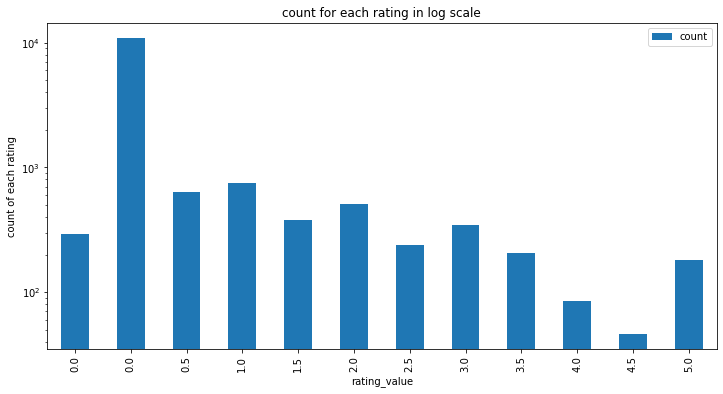

In [8]:
# plot a bar plot to visualise the ratings
rating_cnt_for_vis = rating_cnt
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating in log scale',
    figsize=(12,6)
)
ax.set_xlabel('rating_value')
ax.set_ylabel('count of each rating')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

In [9]:
# 2) plot rating frequency of each course(how many time a movie has been rated)

course_freq = pd.DataFrame(ratings.groupby('course_id').size(),columns=['count'])
course_freq

,count
course_id,
8324,1
8325,1
11153,1
11174,1
11475,1
...,...
1276020,1
1276182,1
1276364,1


Text(0, 0.5, 'rating freq of courses')

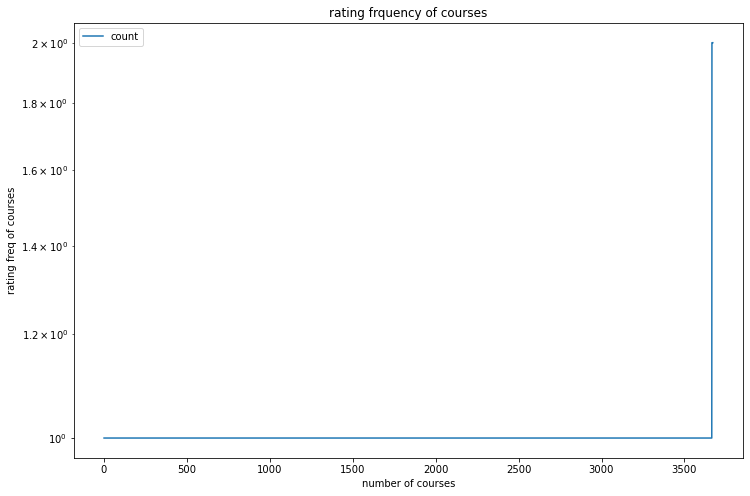

In [10]:
# plot course rating freq
course_freq_copy = course_freq.sort_values(by='count',ascending=True)
course_freq_copy=course_freq_copy.reset_index(drop=True)

ax1  = course_freq_copy.plot(
    title='rating frquency of courses',
    logy=True,
    figsize=(12,8)
)
ax1.set_xlabel('number of courses')
ax1.set_ylabel('rating freq of courses')

In [11]:
# we can see that most of the movies are rated very rarely ..
# so we can remove those movies which are rated less than 50 times.

threshold_rating_freq = 10

# first take out the subject for which course is rated more than threshold value than keep only this courses in our original ratings dataframe
# course_freq.query('count>= @threshold_rating_freq').shape = (13360,1)
# our original course_freq has shape of (9724 ,1) and now its reduce to (2269,1)
# so now lets reduce the size of ratings dataframe

popular_course = list(set(course_freq.query('count>=@threshold_rating_freq').index))

# ratings df after dropping non popular courses
ratings_with_popular_courses = ratings[ratings.course_id.isin(popular_course)]

print('shape of ratings:')
print(ratings.shape)

print('shape of ratings_with_popular_courses:')
print(ratings_with_popular_courses.shape)

print("no of courses which are rated more:")
print(len(popular_course))

print("no of unique courses present in dataset:")
print(unique_course)

shape of ratings:
(3678, 3)
shape of ratings_with_popular_courses:
(0, 3)
no of courses which are rated more:
0
no of unique courses present in dataset:
4


In [75]:
user_cnt = pd.DataFrame(ratings.groupby('subject').size(),columns=['count'])
user_cnt_copy = user_cnt
user_cnt

,count
subject,
Business Finance,1195
Graphic Design,603
Musical Instruments,680
Web Development,1200


 	Subject   	Count 
 -------------------------------
 Business Finance 	1195
 Graphic Design 	603
 Musical Instruments	680
 Web Development	1200


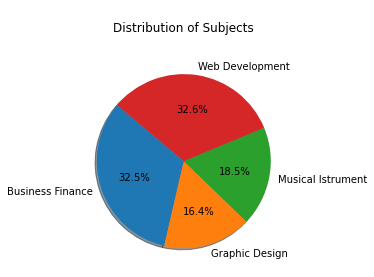

In [92]:
print('\033[1m','	Subject   	Count','\033[0m\n','-------------------------------\n','Business Finance 	1195\n',
'Graphic Design 	603\n',
'Musical Instruments	680\n',
'Web Development	1200')
subject1=['Business Finance', 'Graphic Design', 'Musical Istrument', 'Web Development']
count=['1195','603','680','1200'] 
plt.pie(count,labels=subject1, autopct='%1.1f%%',shadow=True,startangle=140)
plt.title('\nDistribution of Subjects\n')
plt.show()

Text(0, 0.5, 'rating frequency')

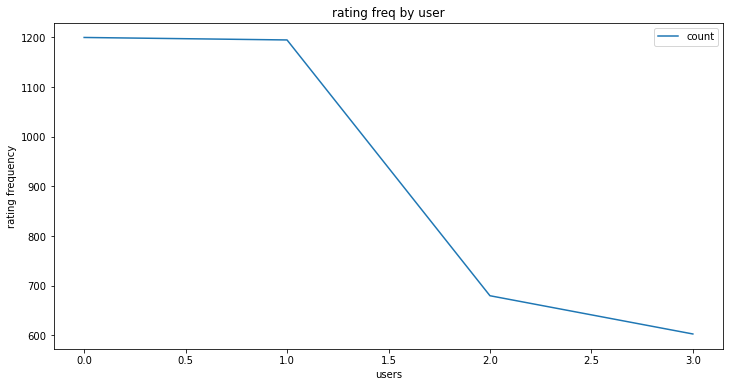

In [13]:
# plot rating freq
ax  = user_cnt_copy.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by user',
      figsize=(12,6),
      
)
ax.set_xlabel("users")
ax.set_ylabel("rating frequency")

In [14]:
# you cans see tha rating frequency vs users characterstics is tail - like structure which is similar to previous plot.
# generally there are just few user who are interseted in giving rating to courses
# lets find the user who gives rating more
threshold_val = 30
active_id = list(set(user_cnt.query('count>=@threshold_val').index))

#upadte your ratings_with_popular_courses
ratings_with_popular_courses_with_active_id = ratings_with_popular_courses[ratings_with_popular_courses.subject.isin(active_id)]

print('shape of ratings_with_popular_courses:')
print(ratings_with_popular_courses.shape)

print('shape of ratings_with_popular_courses_with_active_user:')
print(ratings_with_popular_courses_with_active_id.shape)

print("unique_id:")
print(unique_id)

print("active_id")
print(len(active_id))

print("unique_courses")
print(unique_course)

print("popular_courses")
print(len(popular_course))

shape of ratings_with_popular_courses:
(0, 3)
shape of ratings_with_popular_courses_with_active_user:
(0, 3)
unique_id:
3672
active_id
4
unique_courses
4
popular_courses
0


In [15]:
print("sparsity of final ratings df:")
print( (124*6 - 170)/(124*6) )

sparsity of final ratings df:
0.771505376344086


In [16]:
final_ratings = ratings_with_popular_courses_with_active_id
#final_ratings.shape
item_user_mat =ratings.pivot_table(index='course_id',columns = 'subject',values='ratings').fillna(0)
item_user_mat.sample(15)

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
course_id,,,,
92194,0.0,0.0,0.0,3.0
555952,0.0,2.5,0.0,0.0
1147664,0.0,1.0,0.0,0.0
1220862,0.5,0.0,0.0,0.0
40670,1.5,0.0,0.0,0.0
874166,0.0,0.0,0.0,5.0
56970,0.0,0.0,1.0,0.0
859422,0.0,0.0,0.0,2.0
760990,3.0,0.0,0.0,0.0


In [17]:
# create a mapper which maps movie index and its title
course_to_index = {
    course:i for i,course in enumerate(list(course.set_index('course_id').loc[item_user_mat.index].course_title))
}
#(movie_to_index)

In [18]:
# create a sparse matrix for more efficient calculations
from scipy.sparse import csr_matrix
item_user_mat_sparse = csr_matrix(item_user_mat.values)

In [19]:
# fuzzy_movie_name_matching
from fuzzywuzzy import fuzz

def fuzzy_course_chose (input_str,mapper,print_matches):
    # match_course is list of tuple of 3 values(course_name,index,fuzz_ratio)
    match_course = []
    for course,ind in mapper.items():
        current_ratio = fuzz.ratio(course.lower(),input_str.lower())
        if(current_ratio>=50):
            match_course.append((course,ind,current_ratio))
     
    # sort the match_course with respect to ratio 

    match_course = sorted(match_course,key =lambda x:x[2])[::-1]
    
    if len(match_course)==0:
        print("Oops..! no such course is present here\n")
        return -1
    if print_matches == True:
        print("Some recommendation for given topic are\n")
        for course_title,ind,ratio in match_course:
            print(course_title,'\n')
     
        
    return match_course[0][1] 

C:\Users\KrUzz\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [20]:
# define the model
from sklearn.neighbors import NearestNeighbors
recommendation_model = NearestNeighbors(metric='cosine',algorithm = 'brute',n_neighbors=20,n_jobs=-1)

In [21]:
# create a function which takes a movie name and make recommedation for it
def make_recommendation(input_str,data,model,mapper,n_recommendation):
    print("You are searching for",input_str,"\n")
    model.fit(data)
    
    index = fuzzy_course_chose (input_str,mapper,print_matches = True)
    
    if index==-1 :
        print("pls enter a valid course name\n")
        return 
    
    index_list = model.kneighbors(data[index],n_neighbors=n_recommendation+1,return_distance=False)
    # now we ind of all recommendation
    # build mapper index->title
    index_to_course={
        ind:course for course,ind in mapper.items()
    }
    
    print("The one who is learning",input_str,"are also registering for:\n")
#     print(index_list[0][2])
    for i in range(1,index_list.shape[1]):
        print(index_to_course[index_list[0][i]])
    return 

In [22]:
make_recommendation('web development',item_user_mat_sparse,recommendation_model,course_to_index,10)

You are searching for web development 

Some recommendation for given topic are

AJAX Development 

The Full Stack Web Development 

Social Network Web Development 

Introduction to Web Development 

Web Development With Google Maps 

CSS Web Development Crash Course 

PHP For WordPress Development 

The Web Developer Bootcamp 

HTML Web Development Crash Course 

Ruby On Rails For Web Development 

Practical Guide to Web Development 

In Depth Web Development Made Easy 

Laravel Blog Development Starter 

Advanced Node.js Development 

The Ultimate Web Development Course 

Learn JavaScript for Web Development 

The All-In-One Web Development Course 

Quick learning jQuery web development 

Automate Web Development With Gulp JS 

Introduction to Web Development: HTML 

Sublime Text for Rapid Web Development 

WordPress Development For Beginners 

CSS Development (with CSS3!) 

Angular 4 Development Decoded 

Foundations of Front-End Web Development 

Beginners Introduction to Web Devel